# <center> 1. Supermarket_Sales Analysis With Pandas : ( EDA )

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Initial Data Exploration

In [18]:
df = pd.read_csv('supermarket_sales.csv',nrows = 1003)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [19]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [20]:
df['Date']  = pd.to_datetime(df['Date'])
df['Date'] 

0      2019-01-05
1      2019-03-08
2      2019-03-03
3      2019-01-27
4      2019-02-08
          ...    
998    2019-02-22
999    2019-02-18
1000   2019-02-18
1001   2019-03-10
1002   2019-01-26
Name: Date, Length: 1003, dtype: datetime64[ns]

In [6]:
df.set_index('Date',inplace=True)

In [7]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,6.220351e-14,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


## Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

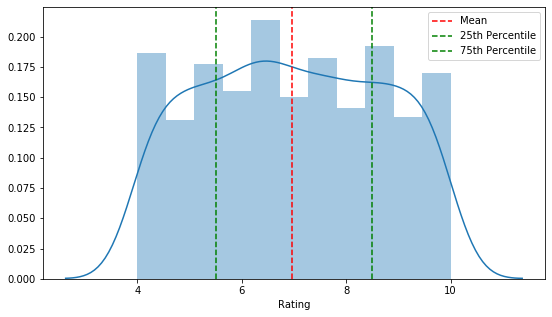

In [10]:
plt.figure(figsize = (9,5))
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),c = 'r',ls = '--',label = 'Mean')
plt.axvline(x=np.percentile(df['Rating'],25),c = 'g',ls = '--',label = '25th Percentile')
plt.axvline(x=np.percentile(df['Rating'],75),c = 'g',ls = '--',label = '75th Percentile')
plt.legend()
plt.show()

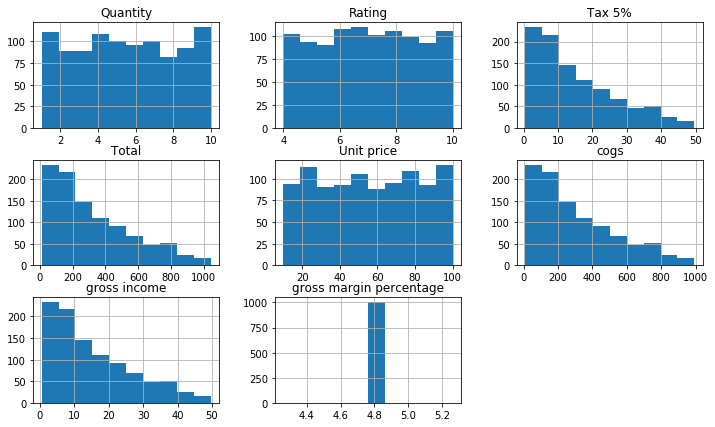

In [11]:
df.hist(figsize = (12,7))
plt.show()

**Question 2:** Do aggregate sales numbers differ by much between branches?

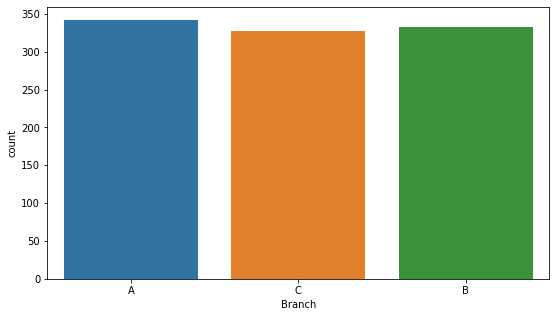

A    342
B    333
C    328
Name: Branch, dtype: int64

In [12]:
plt.figure(figsize = (9,5))
sns.countplot(df['Branch'])
plt.show()
df['Branch'].value_counts()

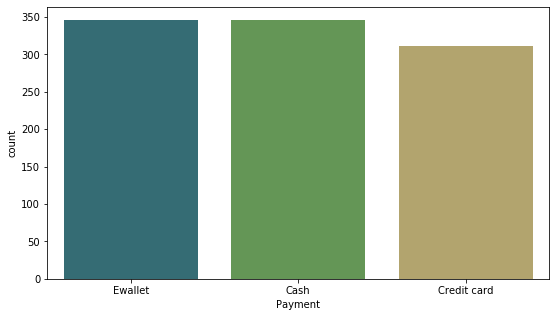

Ewallet        346
Cash           346
Credit card    311
Name: Payment, dtype: int64

In [13]:
plt.figure(figsize = (9,5))
sns.countplot(df['Payment'],palette = 'gist_earth')
plt.show()
df['Payment'].value_counts()

## Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

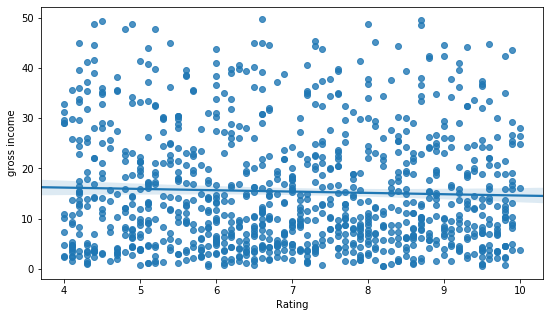

In [14]:
plt.figure(figsize = (9,5))
sns.regplot(df['Rating'],df['gross income'])
plt.show()

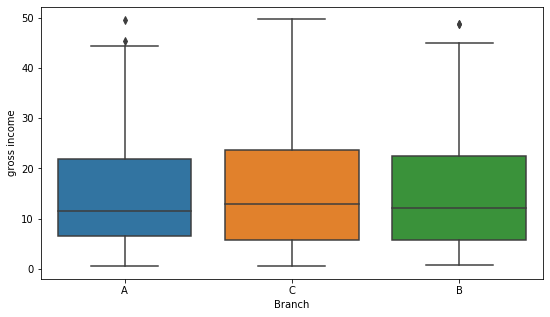

In [15]:
plt.figure(figsize = (9,5))
sns.boxplot(df['Branch'],df['gross income'])
plt.show()

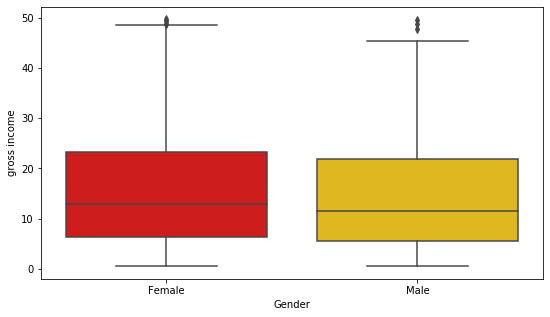

In [16]:
plt.figure(figsize = (9,5))
sns.boxplot(df['Gender'],df['gross income'],palette = 'hot')
plt.show()

**Question 4:** Is there a noticeable time trend in gross income?

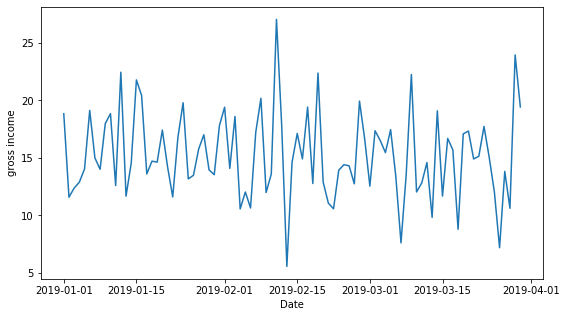

In [21]:
plt.figure(figsize = (9,5))
a = df.groupby(df['Date']).mean().index
b = df.groupby(df['Date']).mean()['gross income']
sns.lineplot(x = a,y = b)
plt.show()

C:\Users\Kagne\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Kagne\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


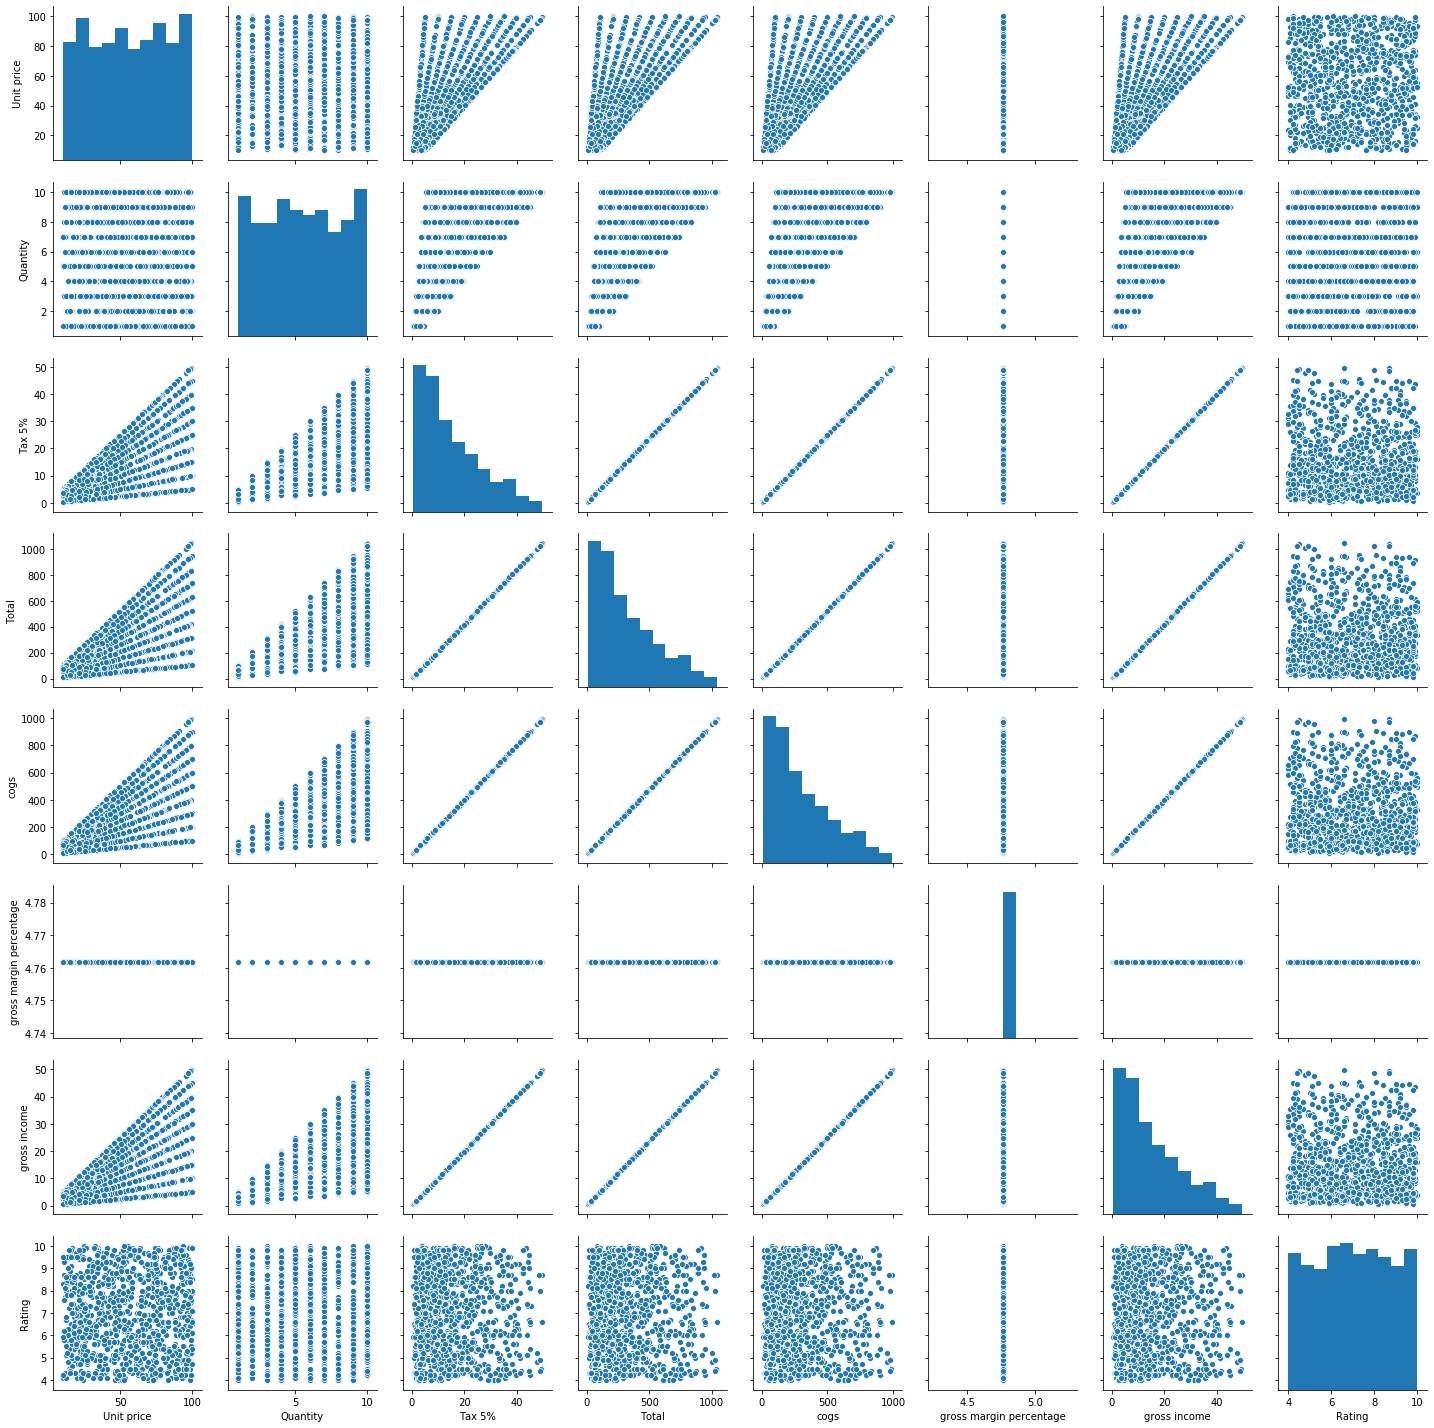

In [22]:
sns.pairplot(df,palette = 'Dark2')
plt.show()

### Task 4: Dealing With Duplicate Rows and Missing Values

In [23]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
998     False
999     False
1000     True
1001     True
1002     True
Length: 1003, dtype: bool

In [24]:
df.drop_duplicates(inplace = True)

In [25]:
df.duplicated().sum()

0

In [26]:
df.isnull().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

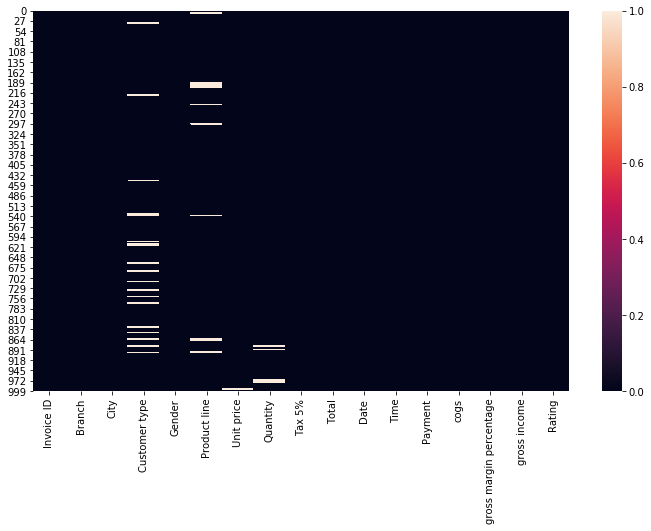

In [27]:
plt.figure(figsize = (12,7))
sns.heatmap(df.isnull())
plt.show()

In [28]:
df.fillna(df.mean(),inplace = True)

In [29]:
df.isnull().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  0
Quantity                    0
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [30]:
df.fillna(df.mode().iloc[0],inplace = True)

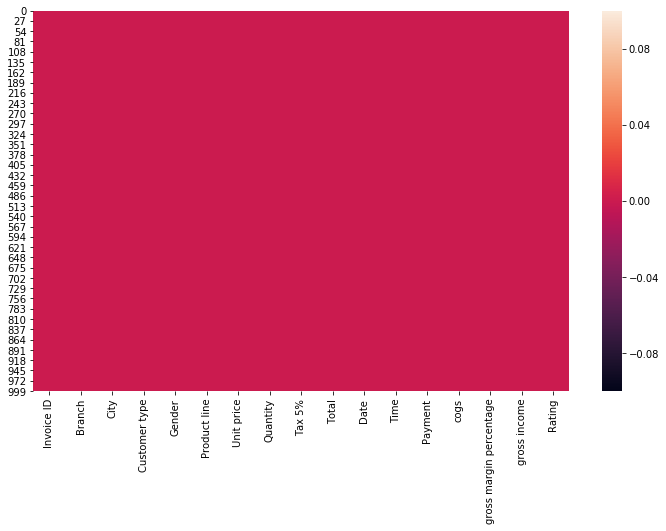

In [31]:
plt.figure(figsize = (12,7))
sns.heatmap(df.isnull())
plt.show()

### Task 5: Correlation Analysis

In [32]:
x = df.corr()
np.round(x,2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,-0.0,0.63,-0.01
Quantity,0.01,1.00,0.70,0.70,0.70,-0.0,0.70,-0.02
Tax 5%,0.63,0.70,1.00,1.00,1.00,0.0,1.00,-0.04
Total,0.63,0.70,1.00,1.00,1.00,0.0,1.00,-0.04
cogs,0.63,0.70,1.00,1.00,1.00,0.0,1.00,-0.04
gross margin percentage,-0.00,-0.00,0.00,0.00,0.00,1.0,0.00,0.00
gross income,0.63,0.70,1.00,1.00,1.00,0.0,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,0.0,-0.04,1.00


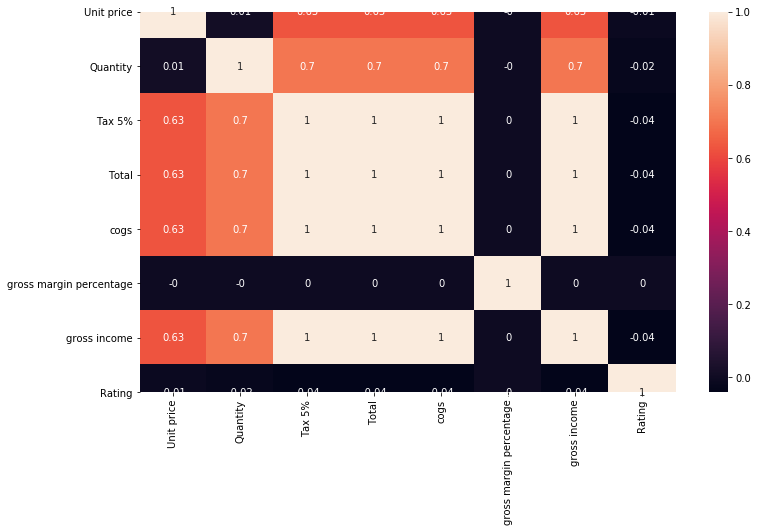

In [33]:
plt.figure(figsize = (12,7))
sns.heatmap(np.round(x,2),annot = True)
plt.show()

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)